House Prices - Advanced Regression Techniques
ссылка - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

# Загрузка и предобработка данных

In [148]:

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats 
from scipy.stats import norm, skew 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, mean_absolute_error, recall_score, roc_auc_score

SyntaxError: invalid syntax (1061314571.py, line 1)

In [149]:
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Попробуем импортировать библиотеки XGBoost и LightGBM и установим их при необходимости
try:
    from xgboost import XGBRegressor
except ImportError:
    !pip install xgboost
    from xgboost import XGBRegressor

try:
    from lightgbm import LGBMRegressor
except ImportError:
    !pip install lightgbm
    from lightgbm import LGBMRegressor

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 220.2 kB/s eta 0:07:33
   ---------------------------------------- 0.0/99.8 MB 245.8 kB/s eta 0:06:46
   ---------------------------------------- 0.1/99.8 MB 547.6 kB/s eta 0:03:02
   ---------------------------------------- 0.3/99.8 MB 1.1 MB/s eta 0:01:35
   ---------------------------------------- 0.4/99.8 MB 1.4 MB/s eta 0:01:12
   ---------------------------------------- 0.8/99.8 MB 2.3 MB/s eta 0:00:43
    --------------------------------------- 1.3/99.8 MB 3.5 MB/s eta 0:00:28
    --------------------------------------- 2.1/99.8 MB 4.9 MB/s eta 0:00:21
   - -------------------------------------- 2.9/99.8 MB 6.2 MB/s eta 0:00:16
   - -------------------------------------- 3.7/99.8 MB 7.3 MB/s eta 0:00:14
   - ---------

In [2]:
test = pd.read_csv('C:\\Users\\eatropynina\\Magnit\\test.csv', sep = ',', encoding='utf-8')
train = pd.read_csv('C:\\Users\\eatropynina\\Magnit\\train.csv', sep = ',', encoding='utf-8')
sample_submission = pd.read_csv('C:\\Users\\eatropynina\\Magnit\\sample_submission.csv', sep = ',', encoding='utf-8')

Количество категориальных признаков:

In [3]:
train.select_dtypes(include=['object']).shape[1]

43

Количество числовых признаков:

In [4]:
train.select_dtypes(include=['int','float']).shape[1]

38

Строим тепловую карту, чтобы найти пропуски

<Axes: >

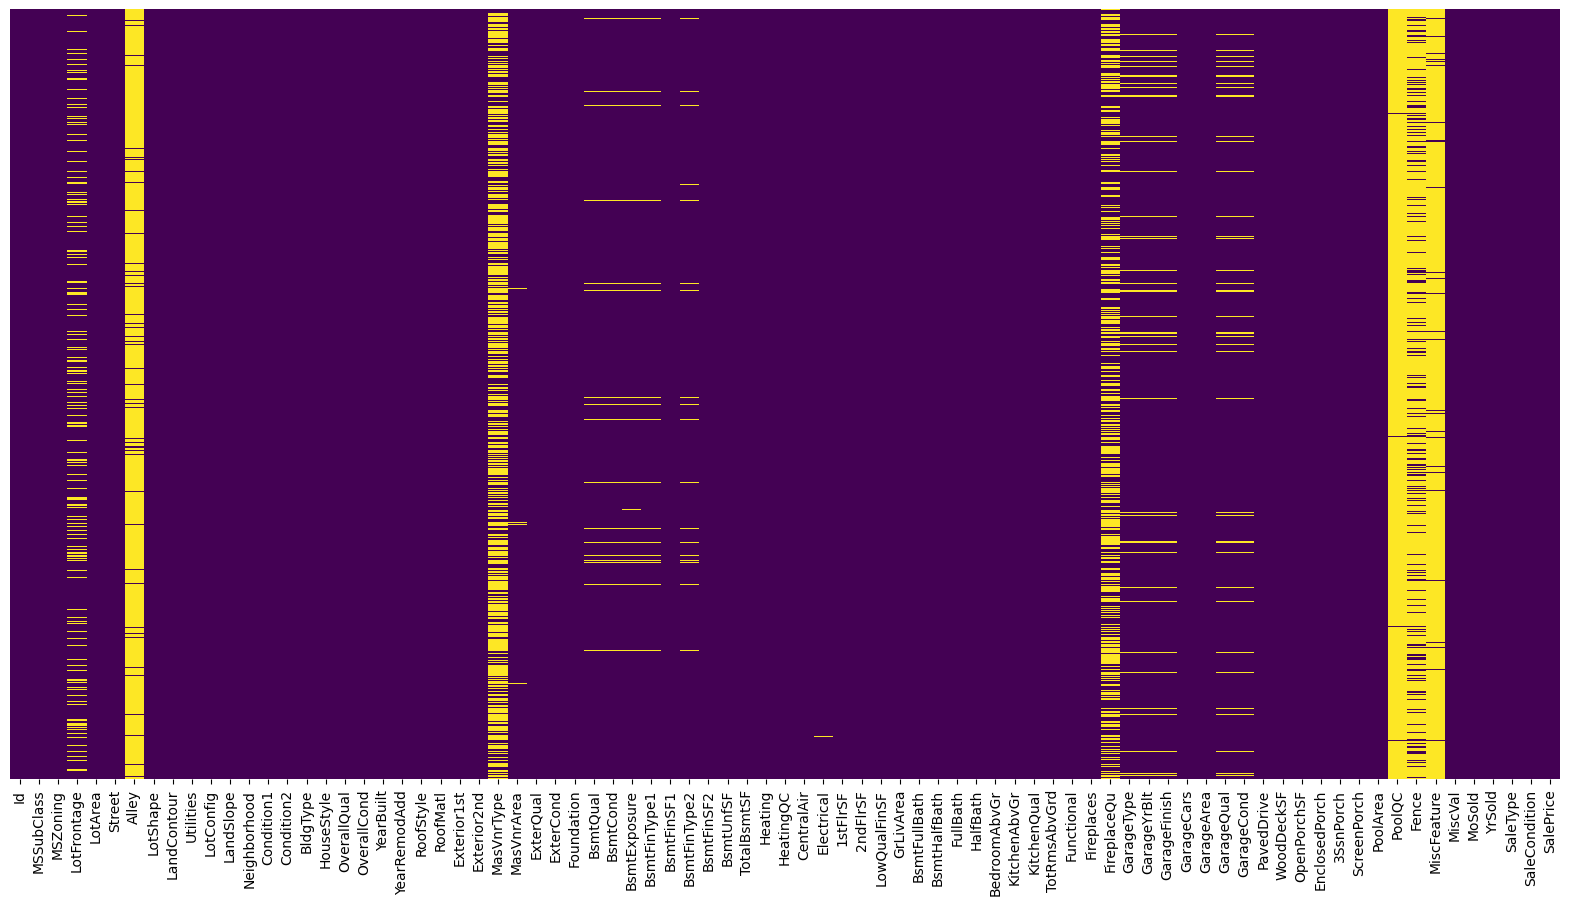

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Смотрим в каких признаках больше всего пропусков в данных

In [6]:
train.isnull().sum().sort_values(ascending=False).head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
dtype: int64

Удалим признаки с 1 по 12, в которых мало данных и много пропусков 

In [7]:
train = train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType','FireplaceQu', 'LotFrontage', 
                            'GarageYrBlt', 'GarageCond', 'GarageFinish', 'GarageType', 'GarageQual', 'BsmtFinType2'])
test = test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType','FireplaceQu', 'LotFrontage', 
                            'GarageYrBlt', 'GarageCond', 'GarageFinish', 'GarageType', 'GarageQual', 'BsmtFinType2'])

Смотрим оставшиеся пропуски в данных

In [8]:
train.isnull().sum().sort_values(ascending=False).head(7)

BsmtExposure    38
BsmtQual        37
BsmtFinType1    37
BsmtCond        37
MasVnrArea       8
Electrical       1
GrLivArea        0
dtype: int64

Смотрим как выглядят наши признаки с пропусками

In [9]:
train['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

Заполняем пропуски признака MasVnrArea средними

In [10]:
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].mean(), inplace=True)

Смотрим остальные признаки

In [11]:
train['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [12]:
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [13]:
train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [14]:
train['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [15]:
train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

Так как признаки категориальные и пропусков достаточно мало, можем просто удалить строки с пропусками и бог нам судья

In [22]:
train.dropna(axis=0, inplace=True)
test.fillna(0, inplace=True)

In [23]:
#train.dropna(subset=['SalePrice'], axis=0, inplace=True)

<Axes: >

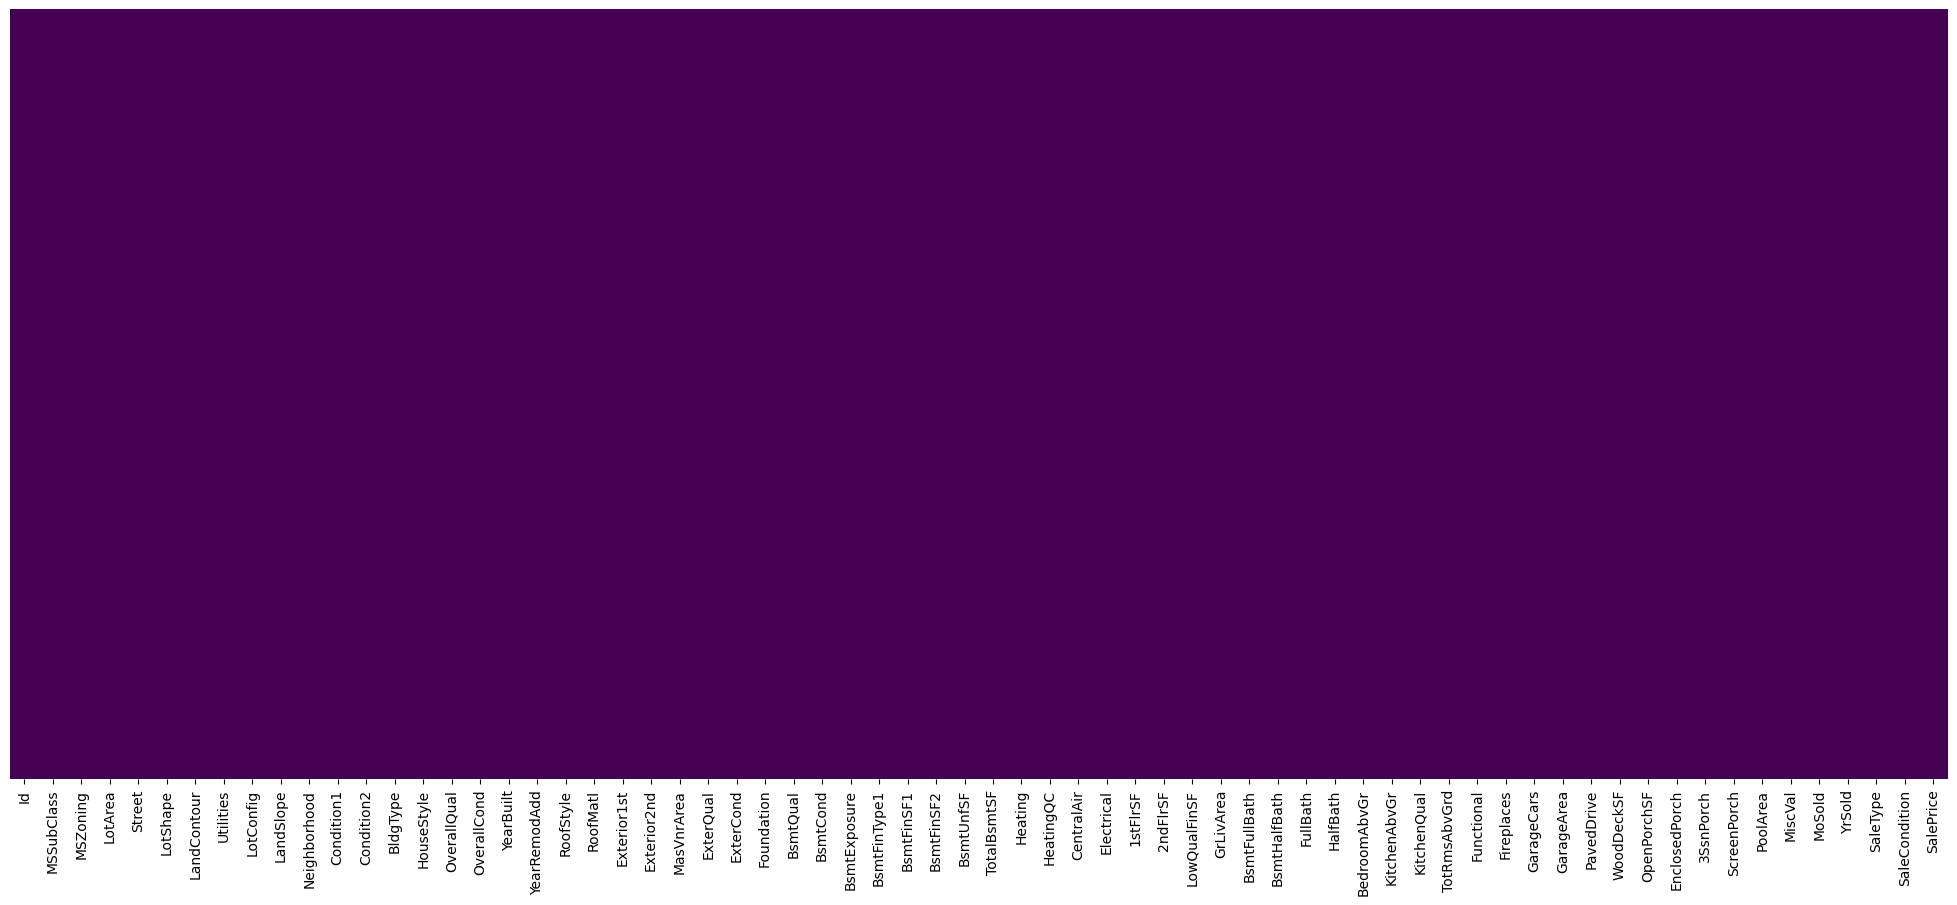

In [25]:
plt.figure(figsize=(25,10))
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [27]:
test.isnull().sum().sum()

0

У нас больше **нет пропущенных значений**! Ура!

# Смотрим выбросы на всех числовых признаках

Смотрим какие есть числовые признаки, чтобы дальше их посмотреть детальнее и поискать в них выбросы

In [28]:
train.dtypes[train.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

Посмотрим выбросы у каждого признака, который хотя бы мало мальски их имеет

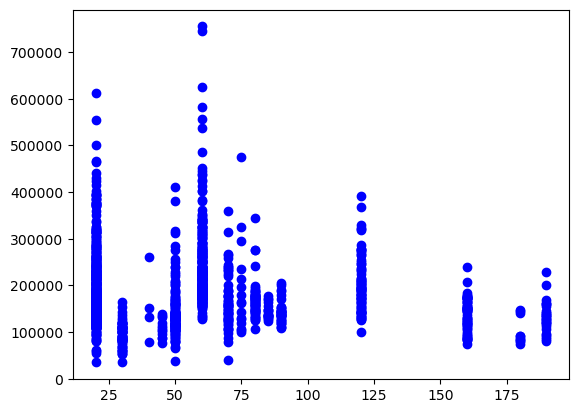

In [29]:
#MSSubClass - класс здания
plt.scatter(x='MSSubClass',y='SalePrice',data = train, color = 'blue')

Тут видимых выбросов нет

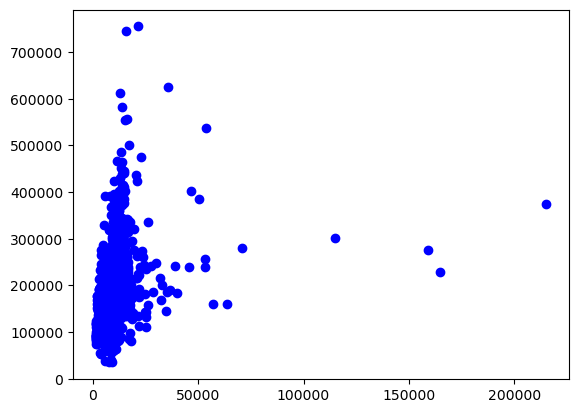

In [30]:
#LotArea - площадь самого участка
plt.scatter(x='LotArea',y='SalePrice',data = train, color = 'blue')

Тут уже есть выбросы, посмотрим какие конкретно строки

In [31]:
#Удалим строки - 249,313,335,706
train.query('LotArea>100000')

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,...,0,0,0,0,500,6,2007,WD,Normal,277000
313,314,20,RL,215245,Pave,IR3,Low,AllPub,Inside,Sev,...,0,0,0,0,0,6,2009,WD,Normal,375000
335,336,190,RL,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,...,0,0,0,0,700,8,2008,WD,Normal,228950
706,707,20,RL,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,...,0,0,0,0,0,6,2007,WD,Normal,302000


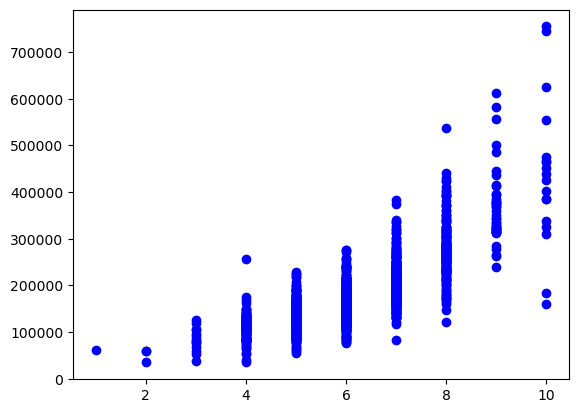

In [32]:
#OverallQual - качество материалов и отделки
plt.scatter(x='OverallQual',y='SalePrice',data = train, color = 'blue')

In [33]:
train.query('OverallQual==10').sort_values(by='SalePrice').head(5)
#Еще уберем 1298, 523

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1442,1443,60,FV,11003,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2009,WD,Normal,310000
583,584,75,RM,13500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,325000
994,995,20,RL,12456,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,337500


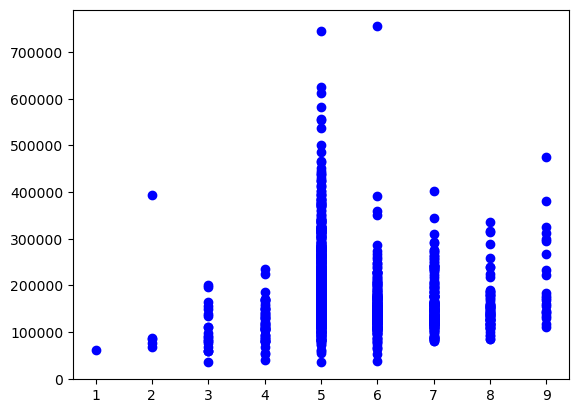

In [34]:
#OverallCond - общая оценка
plt.scatter(x='OverallCond',y='SalePrice',data = train, color = 'blue')

In [35]:
train.query('OverallCond == 2').sort_values(by='SalePrice')
#Уберем 378

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
398,399,30,RM,8967,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,11,2007,WD,Abnorml,67000
250,251,30,RL,5350,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,450,5,2010,WD,Normal,76500
88,89,50,C (all),8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
676,677,70,RM,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,90,0,0,0,0,5,2006,WD,Normal,87000
378,379,20,RL,11394,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,6,2010,New,Partial,394432


In [36]:
train.query('OverallCond == 5').sort_values(by='SalePrice',ascending = False).head(5)
#Еще уберем 1182

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
1169,1170,60,RL,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,625000
898,899,20,RL,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,New,Partial,611657
803,804,60,RL,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,192,0,0,1,2009,New,Partial,582933
1046,1047,60,RL,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,New,Partial,556581


In [37]:
train.query('OverallCond == 6').sort_values(by='SalePrice',ascending = False).head(5)
#Еще уберем 691

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
688,689,20,RL,8089,Pave,Reg,HLS,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,392000
608,609,70,RL,12168,Pave,Reg,HLS,AllPub,Inside,Mod,...,0,0,0,0,0,9,2007,WD,Alloca,359100
654,655,20,RL,10437,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2008,WD,Normal,350000
1024,1025,20,RL,15498,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,174,0,0,0,0,5,2008,COD,Abnorml,287000


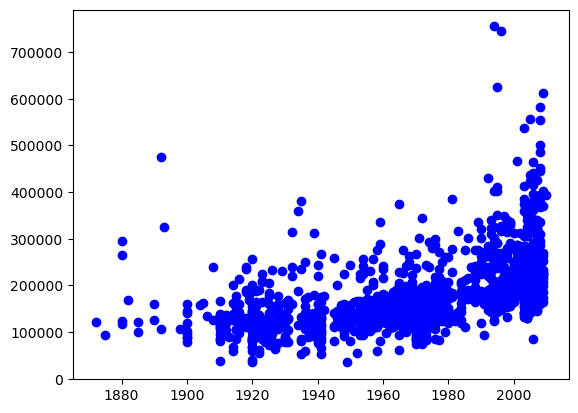

In [38]:
#YearBuilt - год постройки
plt.scatter(x='YearBuilt',y='SalePrice',data = train, color = 'blue')

In [39]:
train.query('YearBuilt > 1890 & YearBuilt < 1900').sort_values(by='SalePrice',ascending = False)
#Еще уберем 185

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,410,0,0,6,2006,WD,Normal,475000
583,584,75,RM,13500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,325000
1292,1293,70,RM,6600,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,12,2009,WD,Normal,107500
809,810,75,RM,8100,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,11,2009,WD,Normal,106000


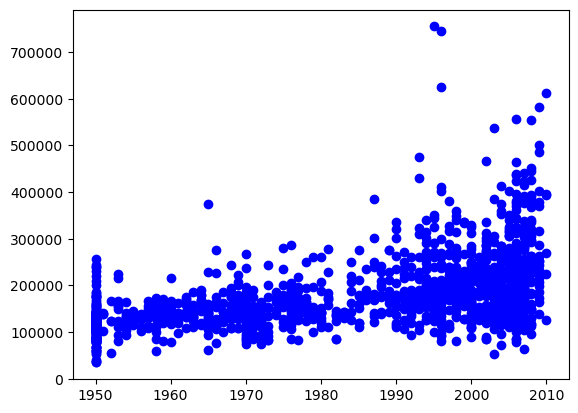

In [40]:
#YearRemodAdd - год, когда был сделан ремонт
plt.scatter(x='YearRemodAdd',y='SalePrice',data = train, color = 'blue')

In [41]:
train.query('YearRemodAdd > 1960 & YearRemodAdd < 1970').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 313

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,215245,Pave,IR3,Low,AllPub,Inside,Sev,...,0,0,0,0,0,6,2009,WD,Normal,375000
1423,1424,80,RL,19690,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,738,0,8,2006,WD,Alloca,274970
1250,1251,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000


In [42]:
train.query('YearRemodAdd > 1990 & YearRemodAdd < 2000').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 691,1182,1169

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
1169,1170,60,RL,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,625000


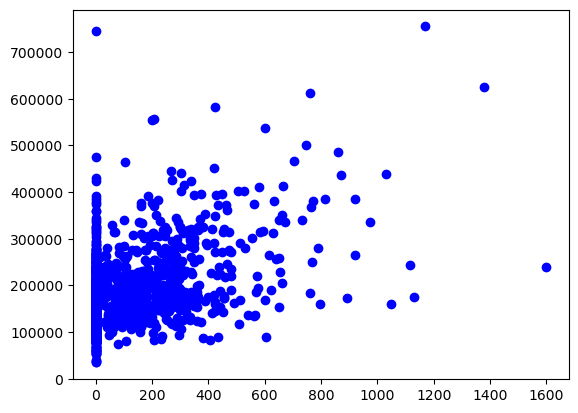

In [43]:
#MasVnrArea - Тип облицовки
plt.scatter(x='MasVnrArea',y='SalePrice',data = train, color = 'blue')

In [44]:
train.query('MasVnrArea > 1500').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 297

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,7399,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,198,0,0,6,2007,WD,Normal,239000


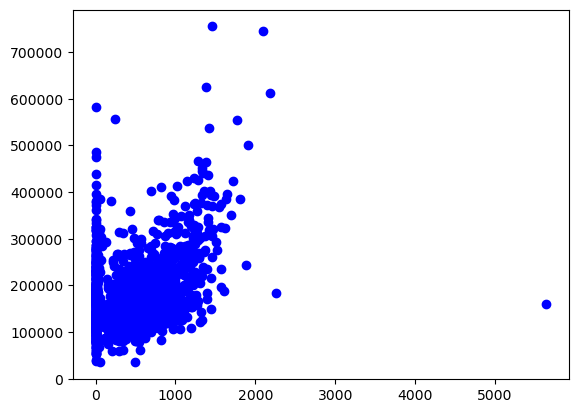

In [45]:
#BsmtFinSF1 - Квадратные футы с отделкой 1-го типа
plt.scatter(x='BsmtFinSF1',y='SalePrice',data = train, color = 'blue')

In [46]:
train.query('BsmtFinSF1 > 5000').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 1298

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


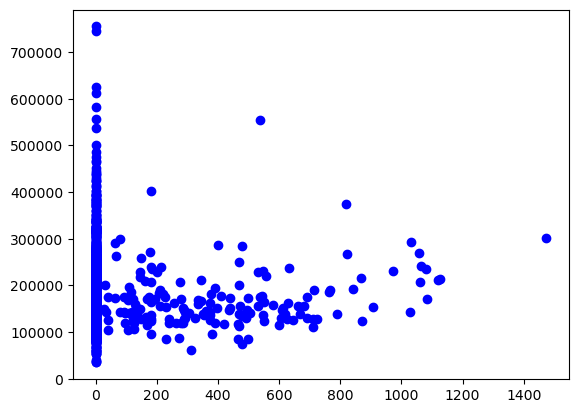

In [47]:
##BsmtFinSF2 - Квадратные футы с отделкой 2-го типа
plt.scatter(x='BsmtFinSF2',y='SalePrice',data = train, color = 'blue')

In [48]:
train.query('BsmtFinSF2 > 1400').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 322

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,10380,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,301000


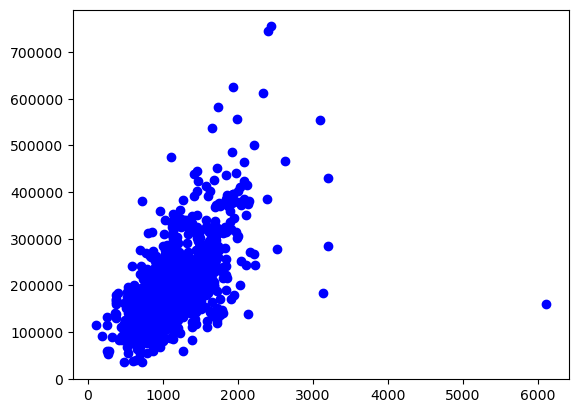

In [49]:
#TotalBsmtSF - Общая площадь фундамента
plt.scatter(x='TotalBsmtSF',y='SalePrice',data = train, color = 'blue')

In [50]:
train.query('TotalBsmtSF > 5000').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 1298

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [51]:
train.query('TotalBsmtSF > 2000').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 1182,691

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
898,899,20,RL,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,New,Partial,611657


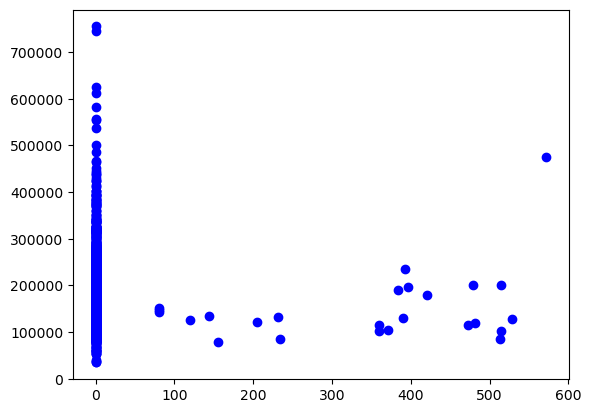

In [52]:
#LowQualFinSF - Низкое качество готовой отделки
plt.scatter(x='LowQualFinSF',y='SalePrice',data = train, color = 'blue')

In [53]:
train.query('LowQualFinSF > 500').sort_values(by='SalePrice',ascending = False).head(3)
#Еще уберем 185

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,410,0,0,6,2006,WD,Normal,475000
635,636,190,RH,10896,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2007,WD,Abnorml,200000
170,171,50,RM,12358,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,128500


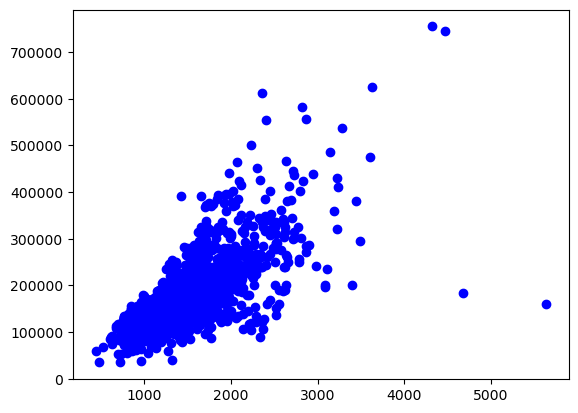

In [54]:
#GrLivArea - площадь жилой зоны
plt.scatter(x='GrLivArea',y='SalePrice',data = train, color = 'blue')

In [55]:
train.query('GrLivArea > 4000').sort_values(by='SalePrice',ascending = False).head(4)
#Еще уберем 691, 1182, 523, 1298

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


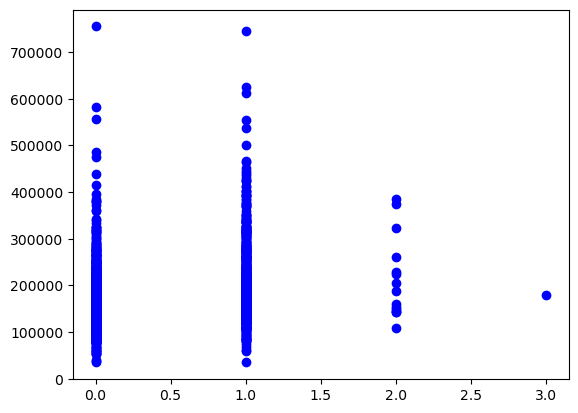

In [56]:
#BsmtFullBath - Ванные комнаты выше уровня земли (кол-во)
plt.scatter(x='BsmtFullBath',y='SalePrice',data = train, color = 'blue')

In [57]:
train.query('BsmtFullBath == 3').sort_values(by='SalePrice',ascending = False).head(4)
#Еще уберем 738

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2009,WD,Alloca,179000


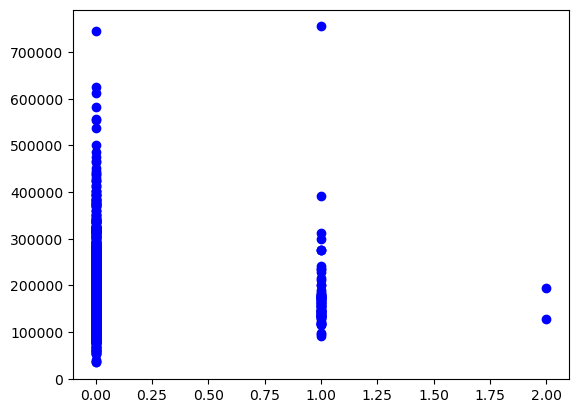

In [58]:
#BsmtHalfBath - полу-ванные комнаты
plt.scatter(x='BsmtHalfBath',y='SalePrice',data = train, color = 'blue')

In [59]:
train.query('BsmtHalfBath == 2').sort_values(by='SalePrice',ascending = False).head(4)
#Еще уберем 597, 954

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,3922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2007,New,Partial,194201
954,955,90,RL,9400,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,10,2006,WD,AdjLand,127500


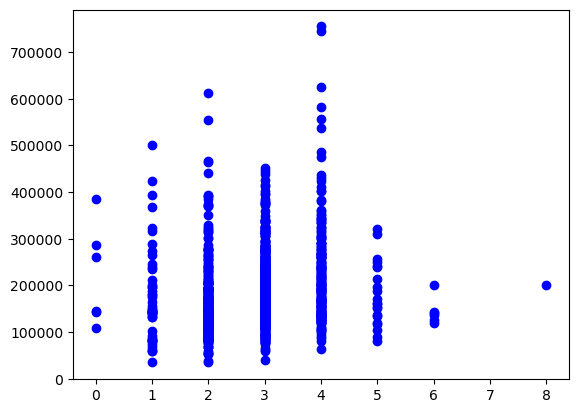

In [60]:
#BedroomAbvGr - кол-во спален
plt.scatter(x='BedroomAbvGr',y='SalePrice',data = train, color = 'blue')

In [61]:
train.query('BedroomAbvGr == 8').sort_values(by='SalePrice',ascending = False).head(4)
#Еще уберем 635

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,10896,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2007,WD,Abnorml,200000


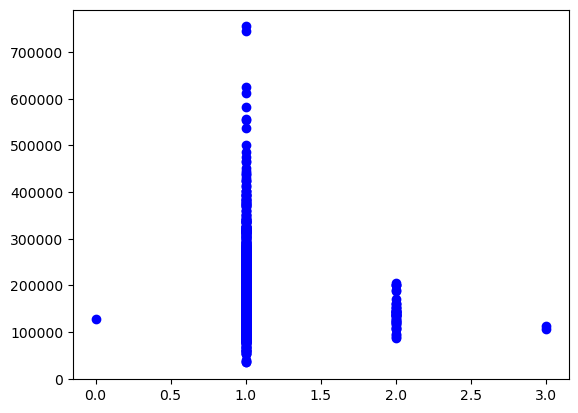

In [62]:
#KitchenAbvGr - кол-во кухонь
plt.scatter(x='KitchenAbvGr',y='SalePrice',data = train, color = 'blue')

In [63]:
train.query('KitchenAbvGr == 3').sort_values(by='SalePrice',ascending = False).head(4)
#Еще уберем 48,809

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,102,0,0,0,0,6,2009,New,Partial,113000
809,810,75,RM,8100,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,11,2009,WD,Normal,106000


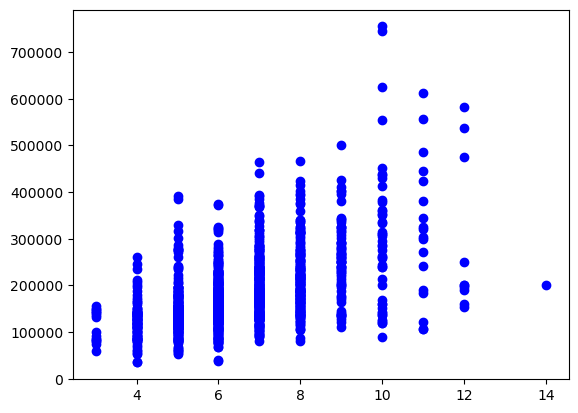

In [64]:
#TotRmsAbvGrd - общее кол-во комнат (без ванн. комнат)
plt.scatter(x='TotRmsAbvGrd',y='SalePrice',data = train, color = 'blue')

In [65]:
train.query('TotRmsAbvGrd == 14').sort_values(by='SalePrice',ascending = False).head(4)
#Еще уберем 635

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,10896,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2007,WD,Abnorml,200000


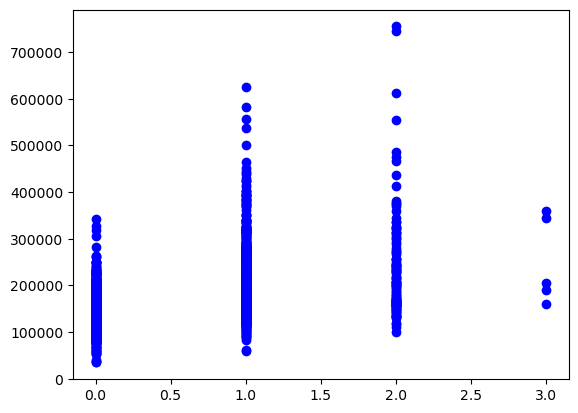

In [66]:
#Fireplaces - кол-во каминов
plt.scatter(x='Fireplaces',y='SalePrice',data = train, color = 'blue')

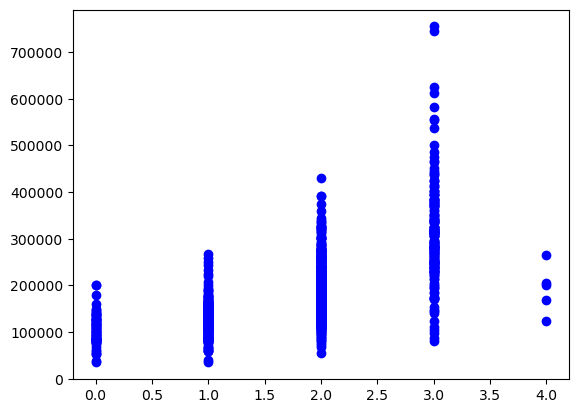

In [67]:
#GarageCars - сколько машин влезает в гараж
plt.scatter(x='GarageCars',y='SalePrice',data = train, color = 'blue')

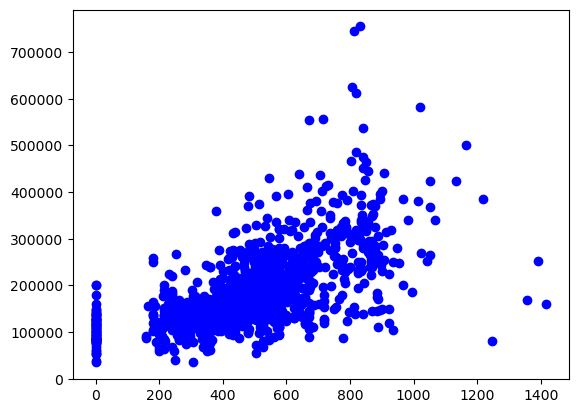

In [68]:
#GarageArea - площадь гаража
plt.scatter(x='GarageArea',y='SalePrice',data = train, color = 'blue')

In [69]:
train.query('GarageArea > 1200').sort_values(by='SalePrice',ascending = False).head(6)
#Еще уберем 825,581,1190,1298,1061

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
825,826,20,RL,14803,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,New,Partial,385000
581,582,20,RL,12704,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2009,New,Partial,253293
1190,1191,190,RL,32463,Pave,Reg,Low,AllPub,Inside,Mod,...,0,0,0,0,0,3,2007,WD,Normal,168000
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
1061,1062,30,C (all),18000,Grvl,Reg,Low,AllPub,Inside,Gtl,...,0,0,0,0,560,8,2008,ConLD,Normal,81000


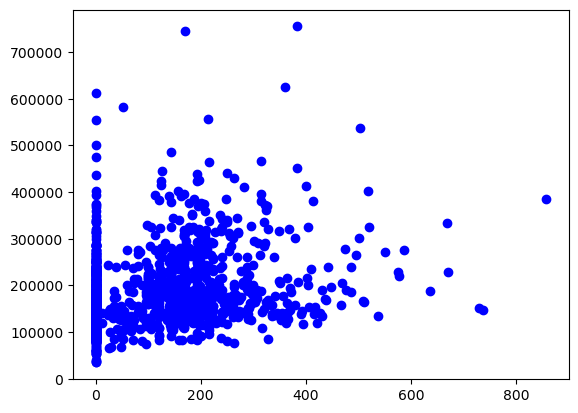

In [70]:
#WoodDeckSF - площадь деревянного настила
plt.scatter(x='WoodDeckSF',y='SalePrice',data = train, color = 'blue')

In [71]:
train.query('WoodDeckSF > 800').sort_values(by='SalePrice',ascending = False).head(6)
#Еще уберем 53

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,50271,Pave,IR1,Low,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2006,WD,Normal,385000


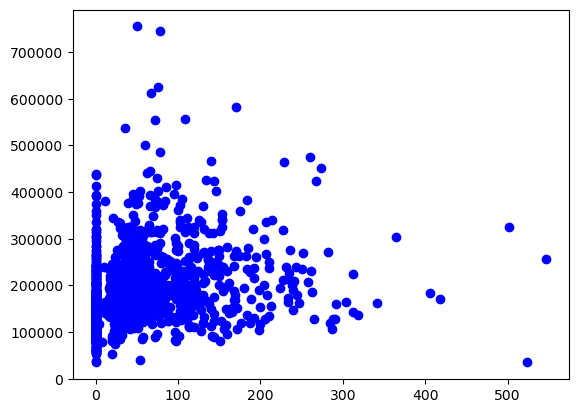

In [72]:
#OpenPorchSF - площадь открытой веранды
plt.scatter(x='OpenPorchSF',y='SalePrice',data = train, color = 'blue')

In [73]:
train.query('OpenPorchSF > 500').sort_values(by='SalePrice',ascending = False).head(6)
#Еще уберем 583,1328,495

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
583,584,75,RM,13500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,325000
1328,1329,50,RM,10440,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,480,0,1150,6,2008,WD,Normal,256000
495,496,30,C (all),7879,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,115,0,0,0,0,11,2009,WD,Abnorml,34900


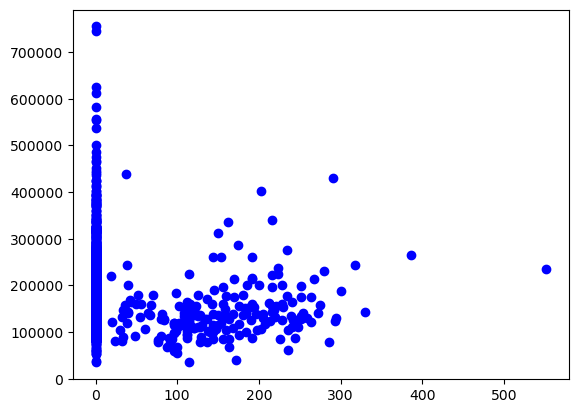

In [74]:
#EnclosedPorch - площадь закрытой веранды
plt.scatter(x='EnclosedPorch',y='SalePrice',data = train, color = 'blue')

In [75]:
train.query('EnclosedPorch > 500').sort_values(by='SalePrice',ascending = False).head(6)
#Еще уберем 197

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,25419,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,552,0,0,512,0,3,2006,WD,Abnorml,235000


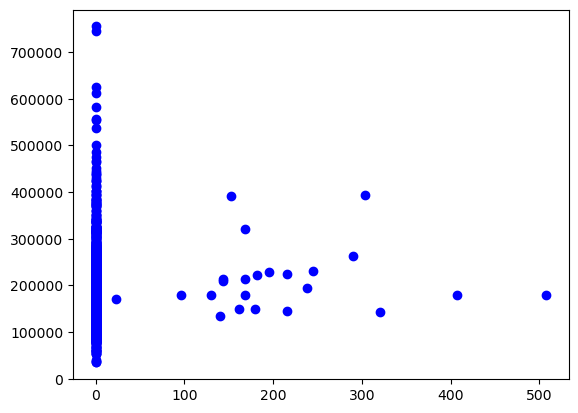

In [76]:
#3SsnPorch - площадь веранды на три сезона
plt.scatter(x='3SsnPorch',y='SalePrice',data = train, color = 'blue')

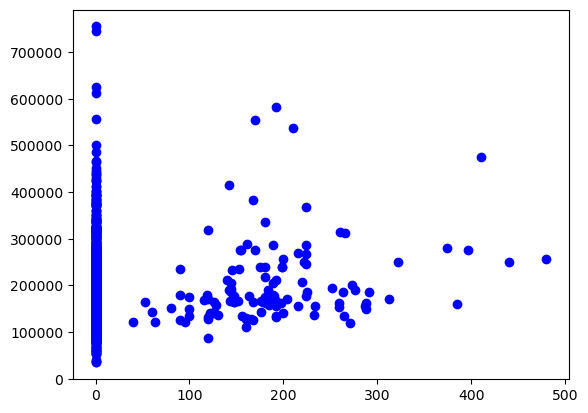

In [77]:
#ScreenPorch - площадь застекленной веранды
plt.scatter(x='ScreenPorch',y='SalePrice',data = train, color = 'blue')

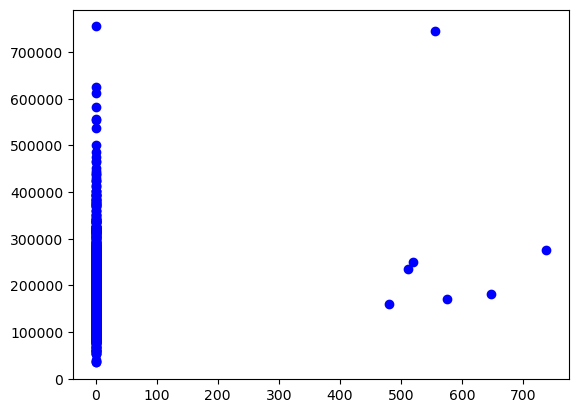

In [78]:
#PoolArea - площадь бассейна
plt.scatter(x='PoolArea',y='SalePrice',data = train, color = 'blue')

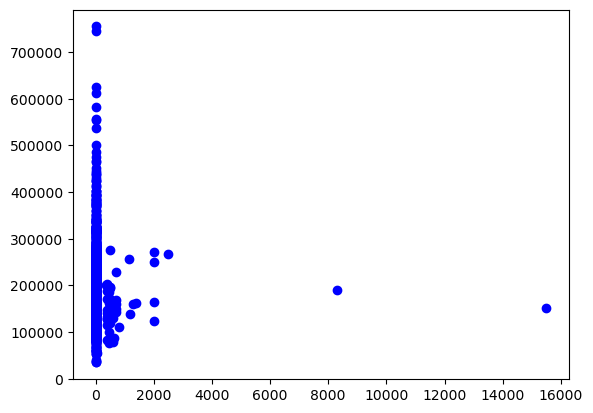

In [79]:
#MiscVal - стоимость прочих дополнений
plt.scatter(x='MiscVal',y='SalePrice',data = train, color = 'blue')

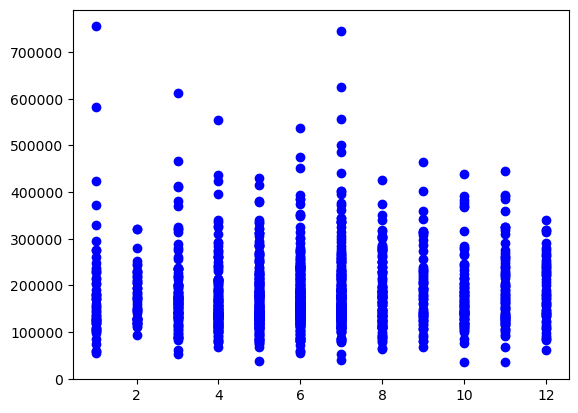

In [80]:
#MoSold - сколько месяцев продавался
plt.scatter(x='MoSold',y='SalePrice',data = train, color = 'blue')

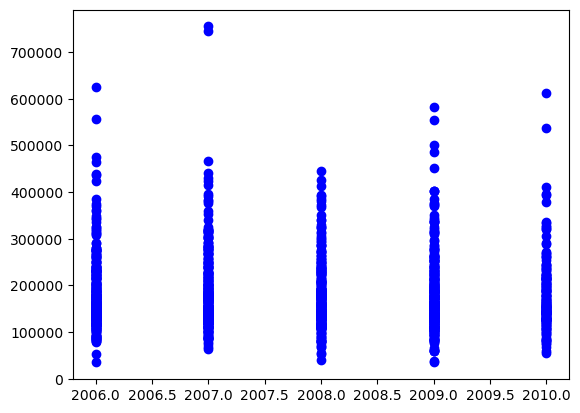

In [81]:
#YrSold - год продажи
plt.scatter(x='YrSold',y='SalePrice',data = train, color = 'blue')

В итоге удаляем следующие номера из датасета, так как они ведут себя как выбросы: 
49, 54, 186, 198, 250, 298, 314, 323, 336, 379, 496, 524, 582, 584, 598, 636, 
692, 707, 739, 810, 826, 935, 955, 1062, 1170, 1183, 1191, 1299, 1329

In [82]:
values=[49,54,186, 198, 250,298,314,323,336,379,496,524,582,584,598,636,692, 707, 739,810,826,935,955,1062,1170,1183,1191, 1299, 1329]

In [83]:
train = train[train.Id.isin(values) == False]

# Feature engineering

Создадим новые признаки путем изменения существующих

In [84]:
#Вычисляем общий возраст дома
train['houseage'] = train['YrSold'] - train['YearBuilt']
test['houseage'] = test['YrSold'] - test['YearBuilt']

In [85]:
#Вычисляем как давно дом обновили
train['houseremodelage'] = train['YrSold'] - train['YearRemodAdd']
test['houseremodelage'] = test['YrSold'] - test['YearRemodAdd']

In [86]:
#Общая площадь дома
train['totalsf'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['BsmtFinSF1'] + train['BsmtFinSF2']
test['totalsf'] = test['1stFlrSF'] + test['2ndFlrSF'] + test['BsmtFinSF1'] + test['BsmtFinSF2']

In [87]:
#Площадь подвальных помещений
train['totalarea'] = train['GrLivArea'] + train['TotalBsmtSF']
test['totalarea'] = test['GrLivArea'] + test['TotalBsmtSF']

In [88]:
#Площадь всех ванных
train['totalbaths'] = train['BsmtFullBath'] + train['FullBath'] + 0.5 * (train['BsmtHalfBath'] + train['HalfBath']) 
test['totalbaths'] = test['BsmtFullBath'] + test['FullBath'] + 0.5 * (test['BsmtHalfBath'] + test['HalfBath']) 

In [89]:
#Площадь веранд в доме
train['totalporchsf'] = train['OpenPorchSF'] + train['3SsnPorch'] + train['EnclosedPorch'] + train['ScreenPorch'] + train['WoodDeckSF']
test['totalporchsf'] = test['OpenPorchSF'] + test['3SsnPorch'] + test['EnclosedPorch'] + test['ScreenPorch'] + test['WoodDeckSF']

In [90]:
#Удалим колонки, которые использовали выше для обобщения
train = train.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', 
                                  '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 
                                  'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 
                                  'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 
                                  'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test = test.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
                                'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 
                                'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 
                                'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

# One-Hot Encoding

Смотрим на наши категориальные признаки

In [91]:
train.dtypes[train.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [92]:
train.shape

(1392, 56)

In [94]:
train_test = pd.get_dummies(pd.concat([train,test]), columns=['MSZoning', 'Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
                                       'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond',
                                       'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','Heating','HeatingQC','CentralAir',
                                      'Electrical','KitchenQual','Functional','PavedDrive','SaleType','SaleCondition'], drop_first=True)

In [95]:
train = train_test.iloc[:1392]

In [96]:
test = train_test.iloc[1392:]

In [98]:
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,196.0,150.0,0,3,1,...,False,False,False,False,True,False,False,False,True,False
1,2,20,9600,6,8,0.0,284.0,0,3,1,...,False,False,False,False,True,False,False,False,True,False
2,3,60,11250,7,5,162.0,434.0,0,3,1,...,False,False,False,False,True,False,False,False,True,False
3,4,70,9550,7,5,0.0,540.0,0,3,1,...,False,False,False,False,True,False,False,False,False,False
4,5,60,14260,8,5,350.0,490.0,0,4,1,...,False,False,False,False,True,False,False,False,True,False


Проверяем, что у нас больше нет категориальных данных

In [99]:
train.dtypes[train.dtypes=='object']

Series([], dtype: object)

In [100]:
test.dtypes[test.dtypes=='object']

Series([], dtype: object)

Смотрим размер датасета после onehotencoding и ужасаемся

In [101]:
train.shape

(1392, 206)

In [102]:
test.shape

(1459, 206)

# Исследование данных

Посмотрим на **общую** картину корреляции данных без категориальных столбцов

<Axes: >

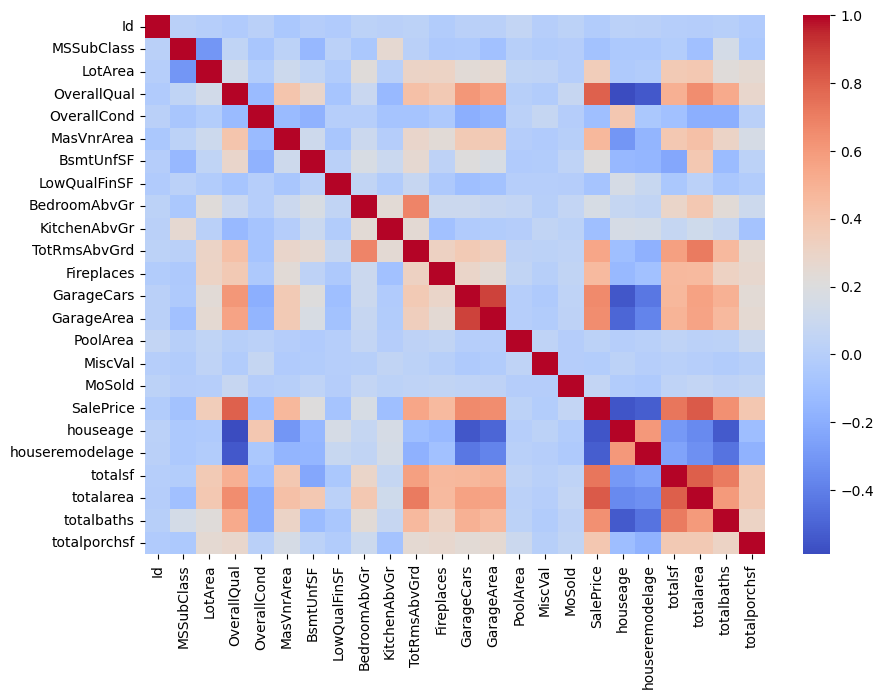

In [104]:
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10,7))
sns.heatmap(train[numerical_columns].corr(),cmap='coolwarm',annot=False)

Как мы видим, есть элементы, которые очень сильно коррелируют между собой, это - GarageCars и GarageArea. Эти элементы, как правило, дают одинаковую информацию, следовательно, они избыточны для нас, из них двоих мы оставим столбец с максимальной корреляцией с SalePrice - GarageArea

In [105]:
train.drop('GarageCars', axis=1, inplace=True)
test.drop('GarageCars', axis=1, inplace=True)

<Axes: >

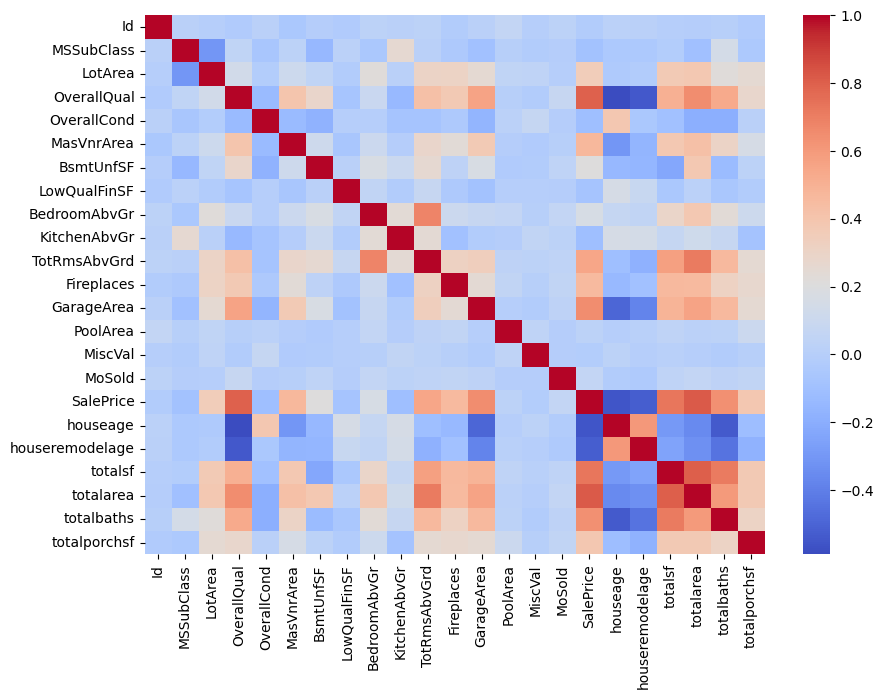

In [106]:
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10,7))
sns.heatmap(train[numerical_columns].corr(),cmap='coolwarm',annot=False)

# Обучение моделей

Будут использованы следующие модели:
- Линейная регрессия;
- Случайные леса (RandomForest);

In [107]:
train['SalePrice'].describe()

count      1392.000000
mean     180695.950431
std       74600.450759
min       35311.000000
25%      131475.000000
50%      164000.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

Посмотрим на распределение

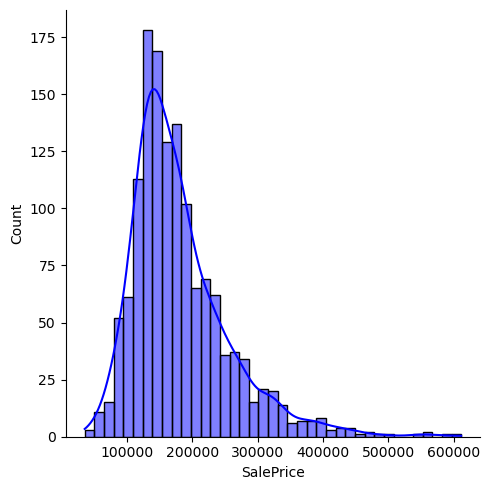

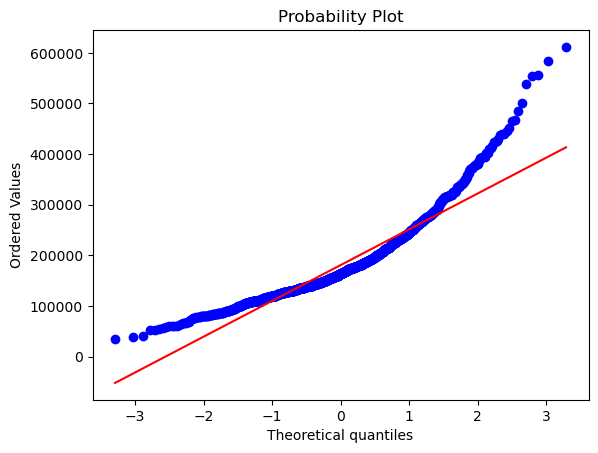

In [108]:
sns.displot(train,x=train['SalePrice'],kde=True, color="blue", linewidth=1)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [111]:
X = train.drop(['SalePrice','Id'], axis=1)
y = train['SalePrice']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Линейная регрессия

In [117]:
model_1 = LinearRegression()

model_1.fit(X_train, y_train)

LinearRegression()

In [118]:
lr = model_1.fit(X_train, y_train)
print("MSE is:", round(mean_squared_error(y_train, lr.predict(X_train)),5))

MSE is: 0.00707


In [120]:
prediction = model_1.predict(X_test)

In [121]:
print("MSE is:", round(mean_squared_error(y_test, prediction),5))

MSE is: 0.0216


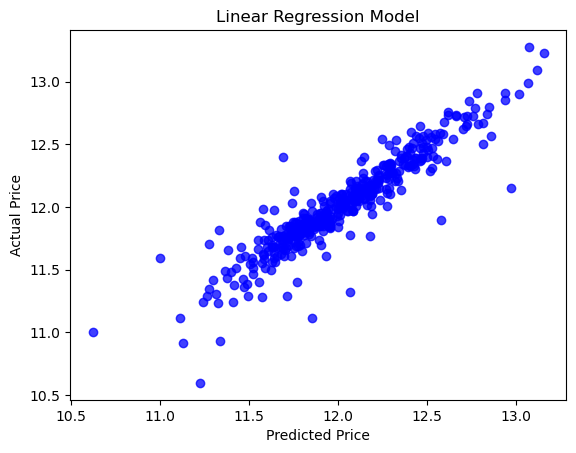

In [123]:
actual_values = y_test
plt.scatter(prediction, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [125]:
prediction_test = model_1.predict(test.drop(columns=['Id','SalePrice']))

In [126]:
sample_submission['SalePrice']=prediction_test

In [127]:
sample_submission.to_csv('C:\\Users\\eatropynina\\Magnit\\test_1.csv',index=False)

Kaggle: Score: 0.35377
4440/5000 место

In [138]:
def modeling(alg, params={}):
    model = alg(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    print('MAE: ', mean_absolute_error(y_test, y_pred))
    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))
    print('R2: ', r2_score(y_test, y_pred))
    
    return model

In [139]:
model_2 = modeling(RandomForestRegressor, params={'n_estimators': 100, 'random_state': 42})

MAE:  0.09353496865918073
MSE:  0.019094595421250873
RMSE:  0.13818319514778515
R2:  0.8654677916071748


In [140]:
model_1 = modeling(LinearRegression)

MAE:  0.09304196359741179
MSE:  0.021600173334994227
RMSE:  0.14696997426343322
R2:  0.8478145801826984


In [141]:
from sklearn.linear_model import Lasso

model_3 = modeling(Lasso, params={'alpha': 1.0, 'random_state': 42})

MAE:  0.12237679219026155
MSE:  0.0315660348126261
RMSE:  0.1776683281078147
R2:  0.7775994578643345


In [142]:
from sklearn.linear_model import Ridge

# Гребневая регрессия - топ
model_4 = modeling(Ridge, params={'alpha': 1.0, 'random_state': 42})

MAE:  0.08334980636841033
MSE:  0.01514392019532152
RMSE:  0.12306063625433407
R2:  0.8933025297129944


In [155]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [156]:
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0, random_state=42))
])

In [157]:
ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(random_state=42))])

In [163]:
X_test = test.drop(columns=['SalePrice','Id'])
prediction_test_log = ridge_pipeline.predict(X_test)
prediction_test = np.expm1(prediction_test_log)

In [164]:
sample_submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': prediction_test
})

In [165]:
sample_submission.to_csv('submission_1.csv', index=False)

In [166]:
sample_submission.head()

,Id,SalePrice
0,1461,117326.795268
1,1462,164557.858125
2,1463,181383.212113
3,1464,201128.825304
4,1465,197203.101498


In [153]:
prediction_test = Ridge.predict(test.drop(columns=['Id','SalePrice']))

TypeError: LinearModel.predict() missing 1 required positional argument: 'X'

In [143]:
from sklearn.tree import DecisionTreeRegressor

# Решающее древо
model_5 = modeling(DecisionTreeRegressor, params={'random_state': 42})

MAE:  0.14042292484005892
MSE:  0.04095665630262814
RMSE:  0.20237750937944696
R2:  0.7114372261249234


In [144]:
from sklearn.svm import SVR

# Машина опорных векторов
model_6 = modeling(SVR, params={'kernel': 'rbf', 'C': 1.0, 'epsilon': 0.1})

MAE:  0.15120444428860513
MSE:  0.045303282130932834
RMSE:  0.21284567679643585
R2:  0.6808127924127365


In [145]:
from sklearn.ensemble import GradientBoostingRegressor

# Градиентный бустинг
model_7 = modeling(GradientBoostingRegressor, params={'n_estimators': 100, 'random_state': 42})

MAE:  0.08839586924844126
MSE:  0.01680744593018234
RMSE:  0.12964353408551596
R2:  0.8815820514367145


In [150]:
from xgboost import XGBRegressor

# XGBoost
model_8 = modeling(XGBRegressor, params={'n_estimators': 100, 'random_state': 42})

MAE:  0.09805718746624201
MSE:  0.020259250384000876
RMSE:  0.14233499353286555
R2:  0.8572621396570924


In [151]:
from lightgbm import LGBMRegressor

# LightGBM
model_9 = modeling(LGBMRegressor, params={'n_estimators': 100, 'random_state': 42})

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2096
[LightGBM] [Info] Number of data points in the train set: 974, number of used features: 115
[LightGBM] [Info] Start training from score 12.032702
MAE:  0.08816614656420474
MSE:  0.017272963022520474
RMSE:  0.1314266450249738
R2:  0.8783022206209666
